In [ ]:
! pip install split-folders

In [ ]:
!pip install bing-image-downloader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchsummary import summary
import os
from sklearn.model_selection import train_test_split
import splitfolders
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
from bing_image_downloader import downloader
downloader.download("federer face close up", limit = 220, output_dir = "CelebDataset")

Streaming output truncated to the last 5000 lines.
[%] Indexed 17 Images on Page 13717.




[!!]Indexing page: 13718

[%] Indexed 17 Images on Page 13718.




[!!]Indexing page: 13719

[%] Indexed 17 Images on Page 13719.




[!!]Indexing page: 13720

[%] Indexed 17 Images on Page 13720.




[!!]Indexing page: 13721

[%] Indexed 17 Images on Page 13721.




[!!]Indexing page: 13722

[%] Indexed 17 Images on Page 13722.




[!!]Indexing page: 13723

[%] Indexed 17 Images on Page 13723.




[!!]Indexing page: 13724

[%] Indexed 19 Images on Page 13724.




[!!]Indexing page: 13725

[%] Indexed 17 Images on Page 13725.




[!!]Indexing page: 13726

[%] Indexed 17 Images on Page 13726.




[!!]Indexing page: 13727

[%] Indexed 17 Images on Page 13727.




[!!]Indexing page: 13728

[%] Indexed 17 Images on Page 13728.




[!!]Indexing page: 13729

[%] Indexed 19 Images on Page 13729.




[!!]Indexing page: 13730

[%] Indexed 17 Images on Page 13730.




[!!]Indexing page: 13731

[%] Indexed

KeyboardInterrupt: ignored

In [ ]:
#from bing_image_downloader import downloader
downloader.download("lionel Messi face close up", limit = 200, output_dir = "CelebDataset")

Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 2367

[%] Indexed 11 Images on Page 2367.




[!!]Indexing page: 2368

[%] Indexed 11 Images on Page 2368.




[!!]Indexing page: 2369

[%] Indexed 11 Images on Page 2369.




[!!]Indexing page: 2370

[%] Indexed 11 Images on Page 2370.




[!!]Indexing page: 2371

[%] Indexed 11 Images on Page 2371.




[!!]Indexing page: 2372

[%] Indexed 11 Images on Page 2372.




[!!]Indexing page: 2373

[%] Indexed 11 Images on Page 2373.




[!!]Indexing page: 2374

[%] Indexed 11 Images on Page 2374.




[!!]Indexing page: 2375

[%] Indexed 11 Images on Page 2375.




[!!]Indexing page: 2376

[%] Indexed 11 Images on Page 2376.




[!!]Indexing page: 2377

[%] Indexed 11 Images on Page 2377.




[!!]Indexing page: 2378

[%] Indexed 11 Images on Page 2378.




[!!]Indexing page: 2379

[%] Indexed 11 Images on Page 2379.




[!!]Indexing page: 2380

[%] Indexed 11 Images on Page 2380.




[!!]Indexing page: 2381

[%] Indexed

KeyboardInterrupt: ignored

In [ ]:
#from bing_image_downloader import downloader
downloader.download("maria sports celebrity", limit = 200, output_dir = "CelebDataset")

Streaming output truncated to the last 5000 lines.
[%] Indexed 25 Images on Page 6105.




[!!]Indexing page: 6106

[%] Indexed 25 Images on Page 6106.




[!!]Indexing page: 6107

[%] Indexed 25 Images on Page 6107.




[!!]Indexing page: 6108

[%] Indexed 25 Images on Page 6108.




[!!]Indexing page: 6109

[%] Indexed 24 Images on Page 6109.




[!!]Indexing page: 6110

[%] Indexed 25 Images on Page 6110.




[!!]Indexing page: 6111

[%] Indexed 25 Images on Page 6111.




[!!]Indexing page: 6112

[%] Indexed 25 Images on Page 6112.




[!!]Indexing page: 6113

[%] Indexed 25 Images on Page 6113.




[!!]Indexing page: 6114

[%] Indexed 25 Images on Page 6114.




[!!]Indexing page: 6115

[%] Indexed 25 Images on Page 6115.




[!!]Indexing page: 6116

[%] Indexed 25 Images on Page 6116.




[!!]Indexing page: 6117

[%] Indexed 25 Images on Page 6117.




[!!]Indexing page: 6118

[%] Indexed 25 Images on Page 6118.




[!!]Indexing page: 6119

[%] Indexed 25 Images on Page 6119.





KeyboardInterrupt: ignored

In [ ]:
downloader.download("serena sports celebrity", limit = 200, output_dir = "CelebDataset")

Streaming output truncated to the last 5000 lines.

[!!]Indexing page: 1023

[%] Indexed 14 Images on Page 1023.




[!!]Indexing page: 1024

[%] Indexed 14 Images on Page 1024.




[!!]Indexing page: 1025

[%] Indexed 15 Images on Page 1025.




[!!]Indexing page: 1026

[%] Indexed 14 Images on Page 1026.




[!!]Indexing page: 1027

[%] Indexed 14 Images on Page 1027.




[!!]Indexing page: 1028

[%] Indexed 14 Images on Page 1028.




[!!]Indexing page: 1029

[%] Indexed 14 Images on Page 1029.




[!!]Indexing page: 1030

[%] Indexed 14 Images on Page 1030.




[!!]Indexing page: 1031

[%] Indexed 14 Images on Page 1031.




[!!]Indexing page: 1032

[%] Indexed 14 Images on Page 1032.




[!!]Indexing page: 1033

[%] Indexed 14 Images on Page 1033.




[!!]Indexing page: 1034

[%] Indexed 15 Images on Page 1034.




[!!]Indexing page: 1035

[%] Indexed 14 Images on Page 1035.




[!!]Indexing page: 1036

[%] Indexed 14 Images on Page 1036.




[!!]Indexing page: 1037

[%] Indexed 1

KeyboardInterrupt: ignored

In [ ]:
# transformations
transform = transforms.Compose([
    transforms.Resize((96, 96)),  # Resize the image to a specific size
    transforms.ToTensor(), # normalizes to range [0,1]
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # further normalization
                       ])

In [ ]:
import splitfolders


splitfolders.ratio("CelebDataset", output="pro_out",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 1010 files [00:15, 66.41 files/s]


In [ ]:
train_data = datasets.ImageFolder('pro_out/train', transform = transform)
test_data = datasets.ImageFolder('pro_out/val', transform = transform)

In [ ]:
# transform to dataloaders
batchsize    = 34
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=34)
class_names = train_data.classes # classes or labels or categories

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['Federer', 'Maria', 'Serena', 'Virat', 'lionel Messi ']
Training images available: 805
Testing images available:  204


In [ ]:
for X,y in train_loader:
  break
print(X.shape)

torch.Size([34, 3, 96, 96])


In [ ]:
y

tensor([0, 3, 2, 0, 4, 2, 2, 1, 0, 2, 2, 4, 0, 3, 1, 0, 0, 1, 3, 2, 1, 3, 4, 3,
        2, 1, 0, 4, 3, 3, 4, 3, 2, 0])

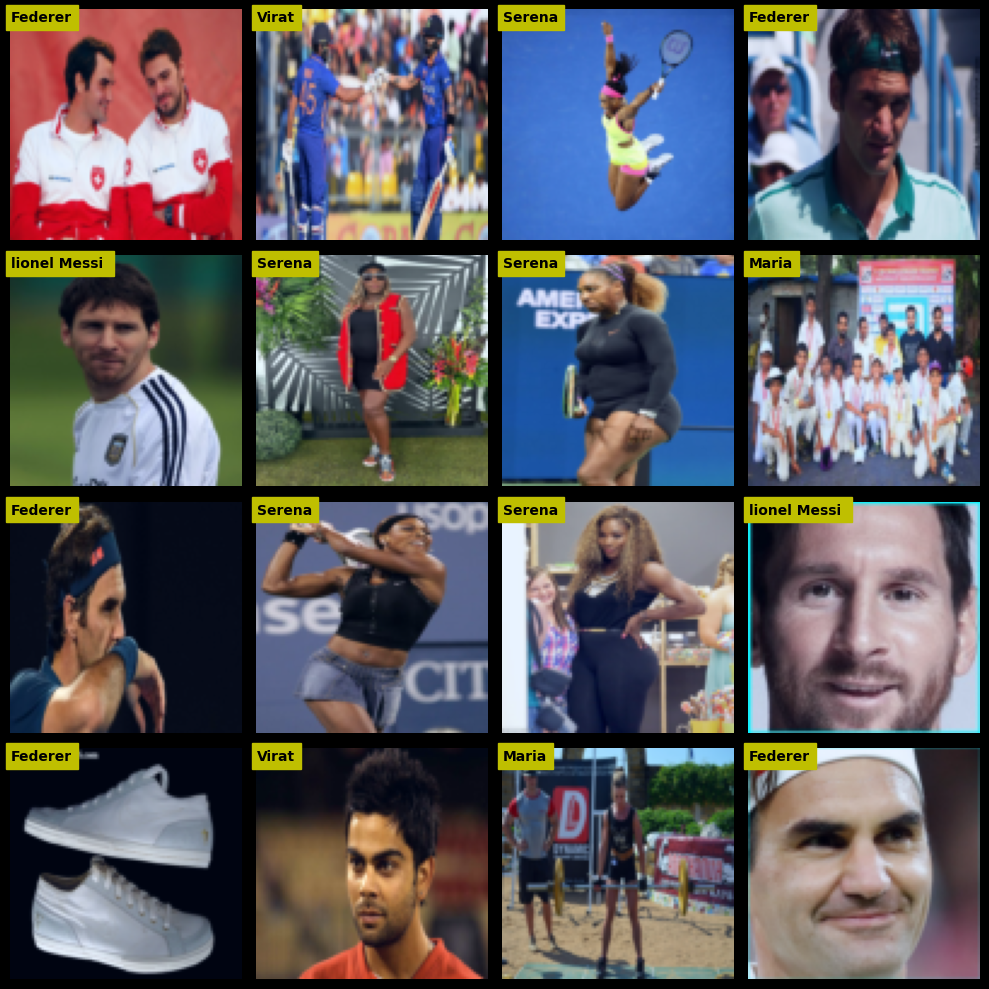

In [ ]:
# inspect a few random images

fig,axs = plt.subplots(4,4,figsize=(10,10))

for (i,ax) in enumerate(axs.flatten()):

  # extract that image (need to transpose it back to 32x32x3)
  pic = X.data[i].numpy().transpose((1,2,0))
  pic = pic-np.min(pic) # undo normalization
  pic = pic/np.max(pic)

  # and its label
  label = train_data.classes[y[i]]

  # and show!
  ax.imshow(pic)
  ax.text(0,0,label,ha='left',va='top',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import torchvision
from torchvision import datasets, transforms, models

In [ ]:
vggnet = torchvision.models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 130MB/s]


In [ ]:
# let's inspect this network
vggnet

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torchsummary import summary
summary(vggnet.to(device),(3,96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]           1,792
              ReLU-2           [-1, 64, 96, 96]               0
            Conv2d-3           [-1, 64, 96, 96]          36,928
              ReLU-4           [-1, 64, 96, 96]               0
         MaxPool2d-5           [-1, 64, 48, 48]               0
            Conv2d-6          [-1, 128, 48, 48]          73,856
              ReLU-7          [-1, 128, 48, 48]               0
            Conv2d-8          [-1, 128, 48, 48]         147,584
              ReLU-9          [-1, 128, 48, 48]               0
        MaxPool2d-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 256, 24, 24]         295,168
             ReLU-12          [-1, 256, 24, 24]               0
           Conv2d-13          [-1, 256, 24, 24]         590,080
             ReLU-14          [-1, 256,

In [ ]:
# Freeze all layers (final layer changed later)
for p in vggnet.parameters():
    p.requires_grad = False

In [ ]:
# change the final layer (this time soft-coded!)
vggnet.classifier[6] = nn.Linear(vggnet.classifier[6].in_features,  5)

In [ ]:
# push the model to the GPU (if using)
vggnet.to(device);

In [ ]:
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(vggnet.parameters(),lr=0.001,momentum=.9)

In [ ]:
numepochs = 15

# initialize losses
trainLoss = torch.zeros(numepochs)
testLoss  = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc   = torch.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

  # loop over training data batches
  vggnet.train() # switch to train mode
  batchLoss = []
  batchAcc  = []
  for X,y in train_loader:

    # push data to GPU
    X = X.to(device)
    y = y.to(device)

    # forward pass and loss
    yHat = vggnet(X)
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss and accuracy from this batch
    batchLoss.append(loss.item())
    batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
  # end of batch loop...

  # and get average losses and accuracies across the batches
  trainLoss[epochi] = np.mean(batchLoss)
  trainAcc[epochi]  = 100*np.mean(batchAcc)


  #### test performance (here done in batches!)
  vggnet.eval() # switch to test mode
  batchAcc  = []
  batchLoss = []
  for X,y in test_loader:

    # push data to GPU
    X = X.to(device)
    y = y.to(device)

    # forward pass and loss
    with torch.no_grad():
      yHat = vggnet(X)
      loss = lossfun(yHat,y)

    # loss and accuracy from this batch
    batchLoss.append(loss.item())
    batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
  # end of batch loop...

  # and get average losses and accuracies across the batches
  testLoss[epochi] = np.mean(batchLoss)
  testAcc[epochi]  = 100*np.mean(batchAcc)

  # print out a status update
  print(f'Finished epoch {epochi+1}/{numepochs}. Test accuracy = {testAcc[epochi]:.2f}%')


Finished epoch 1/15. Test accuracy = 55.88%
Finished epoch 2/15. Test accuracy = 60.29%
Finished epoch 3/15. Test accuracy = 65.20%
Finished epoch 4/15. Test accuracy = 65.69%
Finished epoch 5/15. Test accuracy = 64.22%
Finished epoch 6/15. Test accuracy = 66.67%
Finished epoch 7/15. Test accuracy = 69.12%
Finished epoch 8/15. Test accuracy = 69.12%
Finished epoch 9/15. Test accuracy = 66.18%
Finished epoch 10/15. Test accuracy = 67.16%
Finished epoch 11/15. Test accuracy = 68.14%
Finished epoch 12/15. Test accuracy = 68.14%
Finished epoch 13/15. Test accuracy = 67.16%
Finished epoch 14/15. Test accuracy = 67.16%
Finished epoch 15/15. Test accuracy = 67.65%


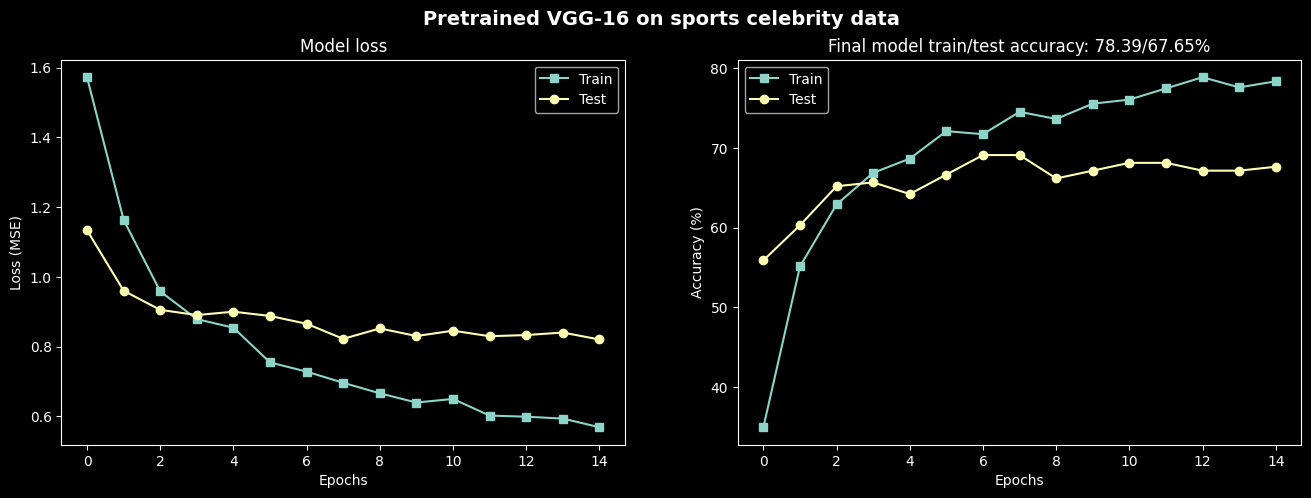

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'o-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model loss')
ax[0].legend()

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model train/test accuracy: {trainAcc[-1]:.2f}/{testAcc[-1]:.2f}%')
ax[1].legend()

plt.suptitle('Pretrained VGG-16 on sports celebrity data',fontweight='bold',fontsize=14)
plt.show()

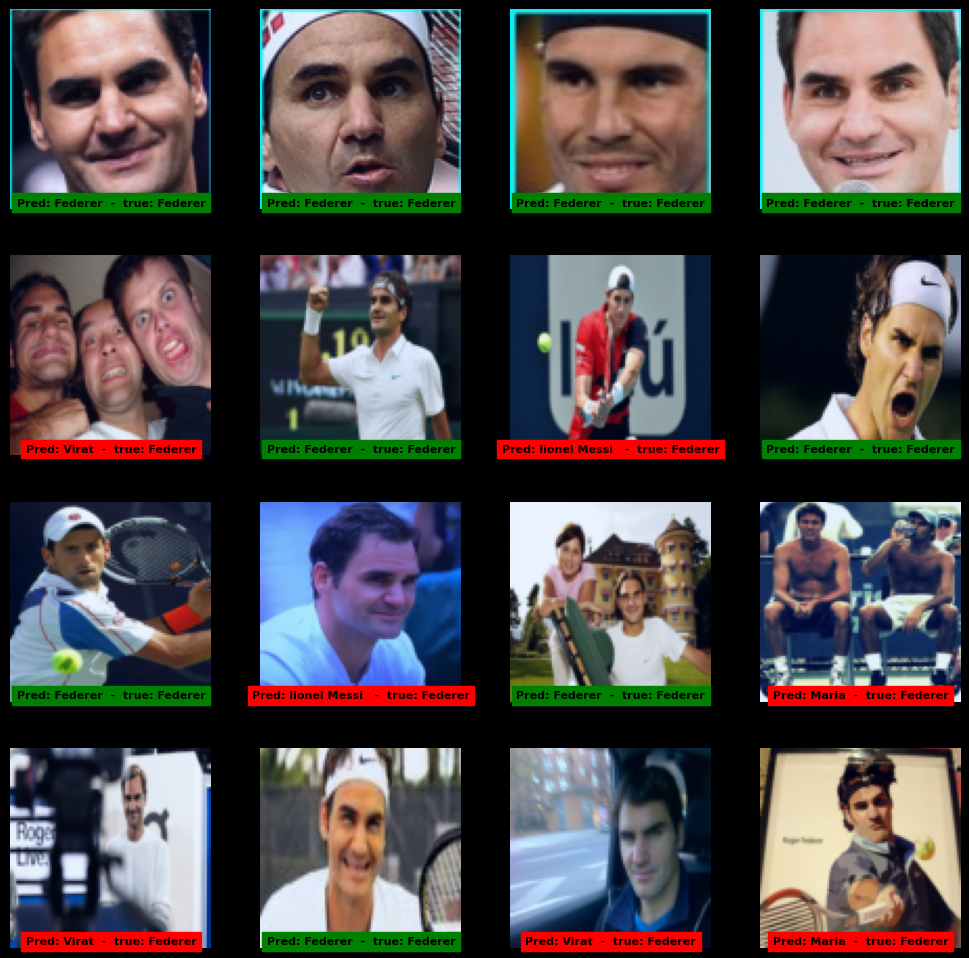

In [ ]:
# inspect a few random images

X,y = next(iter(test_loader))
X = X.to(device)
y = y.to(device)
vggnet.eval()
predictions = torch.argmax( vggnet(X) ,axis=1)


fig,axs = plt.subplots(4,4,figsize=(10,10))

for (i,ax) in enumerate(axs.flatten()):

  # extract that image (need to transpose it back to 96x96x3)
  pic = X.data[i].cpu().numpy().transpose((1,2,0))
  pic = pic-np.min(pic) # undo normalization
  pic = pic/np.max(pic)

  # show the image
  ax.imshow(pic)


  # label and true class
  label = train_data.classes[predictions[i]]
  truec = train_data.classes[y[i]]
  title = f'Pred: {label}  -  true: {truec}'

  # set the title with color-coded accuracy
  titlecolor = 'g' if truec==label else 'r'
  ax.text(48,90,title,ha='center',va='top',fontweight='bold',color='k',backgroundcolor=titlecolor,fontsize=8)
  ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
predicted_labels = []  # List to store predicted labels
true_labels = []  # List to store true labels

vggnet.eval()  # Switch to test mode
for X, y in test_loader:
    X = X.to(device)
    y = y.to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        yHat = vggnet(X)

    # Get the predicted labels and true labels
    predicted_labels.extend(torch.argmax(yHat, axis=1).cpu().numpy())
    true_labels.extend(y.cpu().numpy())


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score for each class
report = classification_report(true_labels, predicted_labels)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.6764705882352942
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        44
           1       0.64      0.71      0.67        41
           2       0.70      0.61      0.65        38
           3       0.68      0.56      0.61        45
           4       0.73      0.83      0.78        36

    accuracy                           0.68       204
   macro avg       0.68      0.68      0.68       204
weighted avg       0.68      0.68      0.67       204

Confusion Matrix:
 [[31  2  2  6  3]
 [ 3 29  7  1  1]
 [ 3 10 23  1  1]
 [ 9  4  1 25  6]
 [ 2  0  0  4 30]]
